<h1>Welcome to the Assignment</h1>

<p>Today we will be starting to do a mini project using financial data and 2 regression methods.<br> The first one will be using Linear Regression and the second is Logistic Regression.</p>

<h2>Objectives</h2>
<p>We will be wanting to understand the mechanism of each regression method and to be able to decide which method to choose for a specific case of the data. Also, learning the importance of the performance result and which measures to focus on so that we can have a clear view whether are we on the correct track.</p>

<h3>Let's Begin...</h3>

<h4>1. Install Libraries</h4>

In [1]:
# Install Yahoo Finance Library
# !pip install yfinance 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
# install Scikit-Learn for Machine Learning
# pip install sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=0eb109a865357496e2bbc423596431e39d8afbbf48df1d07eb9db8935f12b7d0
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


<h4>2. Import Libraries</h4>

In [10]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Get data from Yahoo Finance
import yfinance as yf

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Linear and Logistic Regression
from sklearn.linear_model import LinearRegression, LogisticRegression

# Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

<h4>3. Retrieve Data</h4>

In [43]:
# link: https://sg.finance.yahoo.com/ or just google Yahoo Finance

asset = 'BTC-USD'  # name of the asset
start = '2020-10-12'  # start date
end = '2020-11-12'    # end date

# the data downloaded will consist Open, High, Low, and Close Prices (OHLC)
download_data = yf.download(asset, start=start, end=end, progress=False)

# store the data in pandas dataframe
# give any name to the variable
df_asset = pd.DataFrame(download_data)

# show result and this is what you will get
df_asset.head(10)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-12,11392.635742,11698.467773,11240.686523,11555.363281,11555.363281,26163972642
2020-10-13,11548.719727,11548.984375,11321.224609,11425.899414,11425.899414,24241420251
2020-10-14,11429.047852,11539.977539,11307.831055,11429.506836,11429.506836,24103426719
2020-10-15,11426.602539,11569.914062,11303.603516,11495.349609,11495.349609,24487233058
2020-10-16,11502.828125,11540.061523,11223.012695,11322.123047,11322.123047,25635480772
2020-10-17,11322.123047,11386.261719,11285.345703,11358.101562,11358.101562,19130430174
2020-10-18,11355.982422,11483.359375,11347.578125,11483.359375,11483.359375,18283314340
2020-10-19,11495.038086,11799.092773,11408.290039,11742.037109,11742.037109,23860769928
2020-10-20,11745.974609,11999.917969,11681.480469,11916.334961,11916.334961,30915821592


In [44]:
# statistical summary of the data
df_asset.describe()


,Open,High,Low,Close,Adj Close,Volume
count,32.000000,32.000000,32.000000,32.000000,32.000000,3.200000e+01
mean,13246.794800,13588.498199,13023.867249,13399.566956,13399.566956,3.048724e+10
std,1457.990275,1575.928195,1369.926718,1512.487742,1512.487742,7.614487e+09
min,11322.123047,11386.261719,11223.012695,11322.123047,11322.123047,1.828331e+10
25%,11696.660889,11949.711670,11613.182861,11872.760498,11872.760498,2.452855e+10
50%,13189.681152,13631.782227,12956.155273,13354.583984,13354.583984,2.982116e+10
75%,13996.299561,14526.657227,13746.805664,14308.718750,14308.718750,3.431426e+10
max,15701.298828,16305.003906,15534.771484,16276.343750,16276.343750,5.649950e+10


In [45]:
# check for missing values
df_asset.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<h4>4. Feature Specification</h4>

<p>It is known as an independent variable which is used to determine the value of the target variable. Open, High, Low will be the predictors.</p>

In [46]:
# store data in X variable
X_data = df_asset[['Open', 'High', 'Low']].values

# target variable is Close Price
y_data = df_asset['Close'].values

# the predictors will be in 2-dimensional and target variable should be 1-dimensional
# 1D --> (number of rows, 1 column/index)
# 2D --> (number of rows, 2 columns/index)
X_data.shape, y_data.shape


((32, 3), (32,))

In [47]:
# show the result here for X data
X_data[:5]


array([[11392.63574219, 11698.46777344, 11240.68652344],
       [11548.71972656, 11548.984375  , 11321.22460938],
       [11429.04785156, 11539.97753906, 11307.83105469],
       [11426.60253906, 11569.9140625 , 11303.60351562],
       [11502.828125  , 11540.06152344, 11223.01269531]])

In [48]:
# show the result here for y_data
y_data[:5]


array([11555.36328125, 11425.89941406, 11429.50683594, 11495.34960938,
       11322.12304688])

In [49]:
# split the datasets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, train_size=0.8, random_state=1,
                                                   shuffle=False)

# show the train and test data sizes
print(f'Train and Test Sizes: {len(X_train)}, {len(X_test)} \n')


Train and Test Sizes: 25, 7 



In [50]:
# fit the data into scaling part
scaler = StandardScaler()
x_scale = scaler.fit_transform(X_data)

# show the scaled X shape
print(x_scale.shape)


(32, 3)


<h4>4.1 Linear Regression</h4>

<p>In linear regression, the model coefficients are selected by minimizing a loss function.</p>

In [51]:
# setting a pipeline
pipe_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

# fit the data into the pipeline
fit_pipe_1 = pipe_1.fit(X_train, y_train)

# predict the features
y_pred = fit_pipe_1.predict(X_test)

# performance metrics
# mean squared error
lr_mse = mean_squared_error(y_test, y_pred)

# root mean squared error
lr_rmse = np.sqrt(lr_mse)

# r-squared
lr_r2_score = r2_score(y_test, y_pred)

# show results here
print('--------------Linear Regression Results--------------')
print(f'Mean Squared Error: {lr_mse:0.4}')
print(f'Root Mean Squared Error: {lr_rmse:0.4}')
print(f'R-squared Value: {lr_r2_score:0.4}')


--------------Linear Regression Results--------------
Mean Squared Error: 2.187e+04
Root Mean Squared Error: 147.9
R-squared Value: 0.8684


In [52]:
# show the coefficient and intercept values
lr_coef = pipe_1['regression'].coef_
lr_intercept = pipe_1['regression'].intercept_

print('--------------Linear Regression Coefficients--------------')
print(lr_coef, '\n')
print(f'Open Price Coefficient: {lr_coef[0]:0.4}')
print(f'High Price Coefficient: {lr_coef[1]:0.4}')
print(f'Low Price Coefficient: {lr_coef[2]:0.4} \n\n')

print('--------------Linear Regression Intercept Point--------------')
print(lr_intercept, '\n\n')


--------------Linear Regression Coefficients--------------
[-432.09305218  924.61708115  602.53579625] 

Open Price Coefficient: -432.1
High Price Coefficient: 924.6
Low Price Coefficient: 602.5 


--------------Linear Regression Intercept Point--------------
12812.2415625 




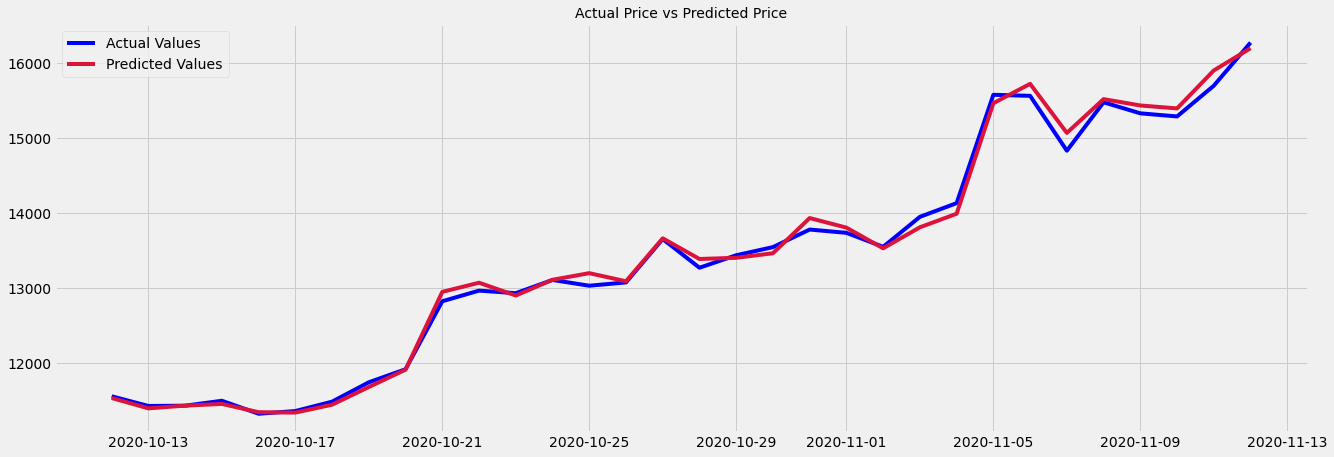

In [53]:
# visualize Linear Regression and Close Price of the asset
plt.figure(figsize=(20, 7))

plt.plot(df_asset['Close'], label='Actual Values', color='blue')
plt.plot(df_asset.index, fit_pipe_1.predict(X_data), label='Predicted Values', color='crimson')
plt.legend(loc='upper left')
plt.title("Actual Price vs Predicted Price", fontsize=14)
plt.grid(True)

plt.show();

<h4>4.2 Logistic Regression</h4>

<p>The model is widely used for predictive analysis and modelling to model a binary dependent variable ( -1, 0, +1 ). For example, True/False, Win/Lose, Healthy/Sick, and so on.</p>

In [62]:
# predictors data
df_asset['O-C'] = df_asset['Open'] - df_asset['Close']
df_asset['H-L'] = df_asset['High'] - df_asset['Low']

# store data in X variable
X_data = df_asset[['O-C', 'H-L']].values

# +1 is Buy if new future price is higher than current price
# -1 is Sell if new future price is lower than current price
y_data = np.where(df_asset['Close'].shift(-1) > df_asset['Close'], 1, -1)

# split the datasets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, train_size=0.8, random_state=2,
                                                   shuffle=False)

# check the data shapes for X and y variables
X_data.shape, y_data.shape


((32, 2), (32,))

In [55]:
# show results of X and y here
print('----------X data values----------')
print(X_data, '\n')

print('----------y data values----------')
print(y_data, '\n\n')


----------X data values----------
[[-1.62727539e+02  4.57781250e+02]
 [ 1.22820312e+02  2.27759766e+02]
 [-4.58984375e-01  2.32146484e+02]
 [-6.87470703e+01  2.66310547e+02]
 [ 1.80705078e+02  3.17048828e+02]
 [-3.59785156e+01  1.00916016e+02]
 [-1.27376953e+02  1.35781250e+02]
 [-2.46999023e+02  3.90802734e+02]
 [-1.70360352e+02  3.18437500e+02]
 [-9.10612305e+02  1.28363770e+03]
 [-1.64255859e+02  4.44500000e+02]
 [ 4.00097656e+01  2.63314453e+02]
 [-1.76488281e+02  2.59319336e+02]
 [ 7.68896484e+01  4.19122070e+02]
 [-4.40468750e+01  4.02915039e+02]
 [-5.78976562e+02  6.98831055e+02]
 [ 3.82929688e+02  9.05444336e+02]
 [-1.66583984e+02  6.31988281e+02]
 [-1.08648438e+02  5.15318359e+02]
 [-2.34462891e+02  5.70683594e+02]
 [ 4.38857422e+01  2.33655273e+02]
 [ 1.86542969e+02  5.65163086e+02]
 [-3.99849609e+02  6.59540039e+02]
 [-1.83218750e+02  6.38294922e+02]
 [-1.44611523e+03  1.60431543e+03]
 [ 1.38486328e+01  6.76597656e+02]
 [ 7.32126953e+02  1.31389258e+03]
 [-6.45813477e+02  8.

In [63]:
# setting a pipeline
pipe_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LogisticRegression())
])

# fit the data into the pipeline
fit_pipe_2 = pipe_2.fit(X_train, y_train)

# predict the features
y_pred = fit_pipe_2.predict(X_test)

# performance metrics
# mean squared error
lr_mse = mean_squared_error(y_test, y_pred)

# root mean squared error
lr_rmse = np.sqrt(lr_mse)

# r-squared
lr_r2_score = r2_score(y_test, y_pred)

# classification report (only for classifier methods)
lr_class_report = classification_report(y_test, y_pred)

# show results here
print('--------------Logistic Regression Results--------------')
print(f'Mean Squared Error: {lr_mse:0.4}')
print(f'Root Mean Squared Error: {lr_rmse:0.4}')
print(f'R-squared Value: {lr_r2_score:0.4} \n')
print('--------------Logistic Regression Classification Report--------------')
print(lr_class_report)


--------------Logistic Regression Results--------------
Mean Squared Error: 2.286
Root Mean Squared Error: 1.512
R-squared Value: -1.333 

--------------Logistic Regression Classification Report--------------
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           1       0.43      1.00      0.60         3

    accuracy                           0.43         7
   macro avg       0.21      0.50      0.30         7
weighted avg       0.18      0.43      0.26         7



In [64]:
# show the coefficient and intercept values
lg_coef = pipe_2['regression'].coef_
lg_intercept = pipe_2['regression'].intercept_

print('--------------Logistic Regression Coefficients--------------')
print(lg_coef, '\n')
# print(f'Open-Close Coefficient: {lg_coef[0]:0.4}')
# print(f'High-Low Coefficient: {lg_coef[1]:0.4} \n\n')

print('--------------Logistic Regression Intercept Point--------------')
print(lg_intercept, '\n\n')


--------------Logistic Regression Coefficients--------------
[[0.85351864 0.33945178]] 

--------------Logistic Regression Intercept Point--------------
[0.81100881] 




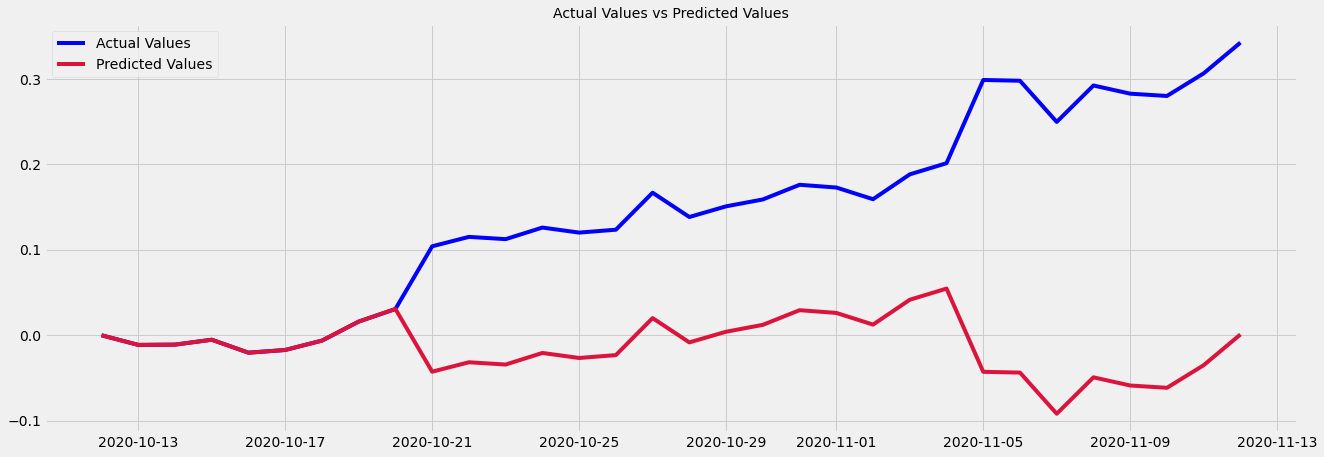

In [65]:
# define log-returns
df_asset['log_ret'] = (np.log(df_asset['Close']).diff().fillna(0))

# predicted values
pred_value = ((fit_pipe_2.predict(X_data)) * df_asset['log_ret']).cumsum()


# visualize Logistic Regression and Close Price of the asset
fig, ax = plt.subplots(figsize=(20, 7))
ax.plot((df_asset['log_ret']).cumsum(), color='blue', label='Actual Values')
ax.plot(df_asset.index, pred_value, color='crimson', label='Predicted Values')
ax.legend(loc='upper left')

plt.title("Actual Values vs Predicted Values", fontsize=14)
plt.grid(True)
plt.show();

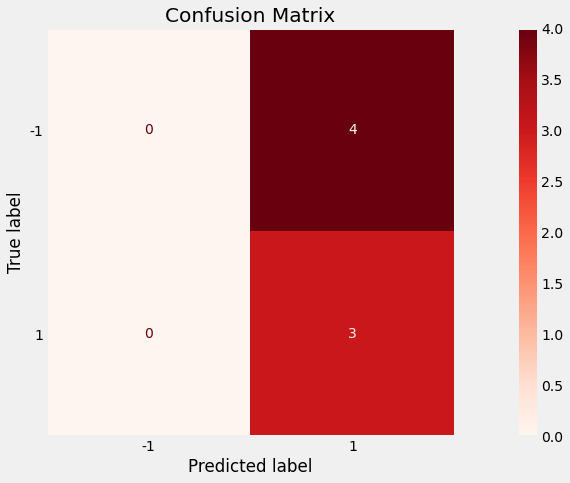

In [66]:
# let's plot confusion matrix to check the performance
# fig, ax = plt.subplots(figsize=(20, 7))
# plot_confusion_matrix(pipe_2, X_test, y_test, ax=ax, cmap='Reds')

# plt.title("Confusion Matrix")
# plt.grid(False)
# plt.show();

<h1>End of Session</h1>

<h3>Thank you for your time</h3>